# Dataset: Bike Sharing Dataset
Reference: Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.[https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset]


# Student Name: Dolamullage Ajith Priyantha




# Date : 14-Oct-2022

# Assignment Instructions
* You will be given ten (10) tasks to complete the code cells. Some tasks may contain subtasks that you will get partial points for completing each.
* **Provide your code ONLY in between hash (#) lines.**
* Do not add or modify code outside the hash (#) lines!
* Example answers, partially completed code, or hints may be provided for some tasks.
* You may diagnose any programing errors encountered and resolve them to get the final solution.

### Example Answer:
**Task 0: create variable named `a` and assign value `3.14`. Then print the value of `a`.**

```python
# Task 0: Type your code below
###############################
a = 3.14
print(a)
###############################
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

# The Problem

A bike rental business owner hired you to build a machine learning solution to enhance his business functions by predicting how many bikes will be rented in a given day.

The business owner provided you with a data set containing daily rental counts collected for two years. You also have some information about each date and weather observations in the dataset.

## 1. Load Python Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 2. Load Data File

In [2]:
file_path= 'https://raw.githubusercontent.com/SumuduTennakoon/MLFoundations/main/Datasets/daily_bike_rental.csv'

# Load CSV File
data = pd.read_csv(file_path)

## 3. Check Completeness of the Dataset

**Task 1**
 * 1.1 Preview a sample of 5 rows of the datset
 * 1.2 Identify column data types
 * 1.3 Identify columns with missing values if there is any

In [3]:
# Task 1.1: Preview a sample of 5 rows of the datset
#############################################################
data.sample(5)
#############################################################

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count
107,107,2011,4,18,MON,0,1.0,CLEAR,21.0,25.2,54.2,11.0,3429
204,204,2011,7,24,SUN,0,0.0,CLEAR,34.0,39.7,55.1,11.3,3606
85,85,2011,3,27,SUN,0,NaN,CLOUDY/MIST,10.4,12.5,49.4,12.3,1693
684,684,2012,11,15,THU,0,1.0,CLOUDY/MIST,13.2,16.2,62.0,10.3,5445
691,691,2012,11,22,THU,1,0.0,CLEAR,13.9,17.5,58.0,3.5,2425


In [ ]:
# Task 1.2: Get to know column data types and total memory usage
#############################################################
data.info()
#############################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            731 non-null    int64  
 1   year              731 non-null    int64  
 2   month             731 non-null    int64  
 3   day               731 non-null    int64  
 4   weekday           731 non-null    object 
 5   is_holiday        731 non-null    int64  
 6   is_workingday     725 non-null    float64
 7   weather_type      731 non-null    object 
 8   temperature       731 non-null    float64
 9   feel_temperature  726 non-null    float64
 10  humidity          731 non-null    float64
 11  windspeed         731 non-null    float64
 12  rental_count      731 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 74.4+ KB


In [4]:
# Task 1.3 Identify columns with missing values.
#############################################################
data.describe(include='all').transpose()

#############################################################

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
row_id,731.0,NaN,NaN,NaN,365.0,211.165812,0.0,182.5,365.0,547.5,730.0
year,731.0,NaN,NaN,NaN,2011.500684,0.500342,2011.0,2011.0,2012.0,2012.0,2012.0
month,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
day,731.0,NaN,NaN,NaN,15.738714,8.809949,1.0,8.0,16.0,23.0,31.0
weekday,731,7,SAT,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
is_workingday,725.0,NaN,NaN,NaN,0.686897,0.464076,0.0,0.0,1.0,1.0,1.0
weather_type,731,3,CLEAR,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,731.0,NaN,NaN,NaN,20.31067,7.505342,2.4,13.8,20.4,26.9,35.3
feel_temperature,726.0,NaN,NaN,NaN,23.712121,8.13556,4.0,16.9,24.35,30.4,42.0


In [ ]:
data.shape

(731, 13)

In [ ]:
data.loc[data['feel_temperature'].isna()]

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count
562,562,2012,7,16,MON,0,1.0,CLEAR,31.3,NaN,64.5,11.0,6830
580,580,2012,8,3,FRI,0,1.0,CLOUDY/MIST,31.4,NaN,64.2,14.5,7175
672,672,2012,11,3,SAT,0,0.0,CLOUDY/MIST,14.1,NaN,49.1,18.1,5138
707,707,2012,12,8,SAT,0,0.0,CLOUDY/MIST,15.6,NaN,91.1,6.8,5582
713,713,2012,12,14,FRI,0,1.0,CLEAR,11.5,NaN,64.3,8.8,5611


In [5]:
data.loc[data['is_workingday'].isna()]

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count
16,16,2011,1,17,MON,1,NaN,CLOUDY/MIST,7.2,8.8,53.8,13.0,1000
29,29,2011,1,30,SUN,0,NaN,CLEAR,8.9,12.5,72.2,5.0,1096
85,85,2011,3,27,SUN,0,NaN,CLOUDY/MIST,10.4,12.5,49.4,12.3,1693
172,172,2011,6,22,WED,0,NaN,CLEAR,30.1,34.7,70.8,11.5,4507
197,197,2011,7,17,SUN,0,NaN,CLEAR,29.5,33.5,60.4,16.4,5302
342,342,2011,12,9,FRI,0,NaN,CLEAR,11.9,15.9,69.6,5.5,3620


## 4. Descriptive Statistics
 



**Task 2: Type your code to find how many rows and columns this dataset. Use print statement display the value.** 
> image.png

In [6]:
# Task2: Complete code below to print number of rows and columns.
#############################################################
rows =  len(data)
columns =  len(data.columns)
#############################################################
print(F"rows = {rows}, columns={columns}")


rows = 731, columns=13


**Task 3: Analyze columns `temperature`, `feel_temperature`, `humidity` and `windspeed`**

 * 3.1 Find and display min, max, mean, median and standard deviation of the column above.

 * 3.2 Plot histograms for above columns
 * 3.3 Describe Categorical Columns

In [7]:
# Task 3.1: Type your code to display display (print) min, max, mean, median and standard deviation of the columns
#############################################################
data[['temperature','feel_temperature','humidity','windspeed']].describe(include='all').transpose()

#############################################################

,count,mean,std,min,25%,50%,75%,max
temperature,731.0,20.310670,7.505342,2.4,13.8,20.40,26.90,35.3
feel_temperature,726.0,23.712121,8.135560,4.0,16.9,24.35,30.40,42.0
humidity,731.0,65.041313,37.804388,0.0,52.0,63.10,73.25,620.0
windspeed,731.0,12.763748,5.192322,1.5,9.0,12.10,15.60,34.0


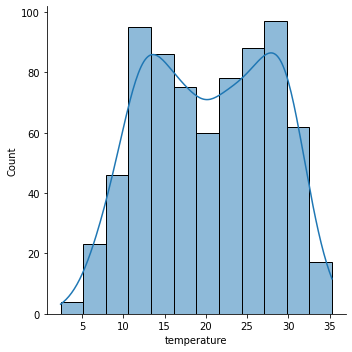

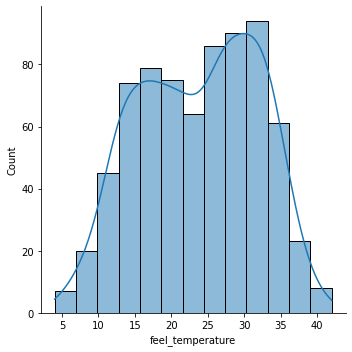

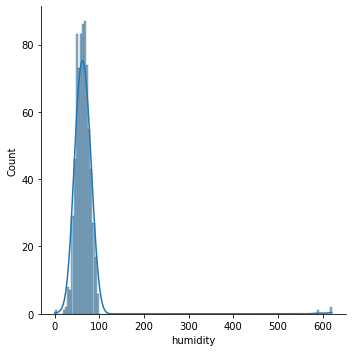

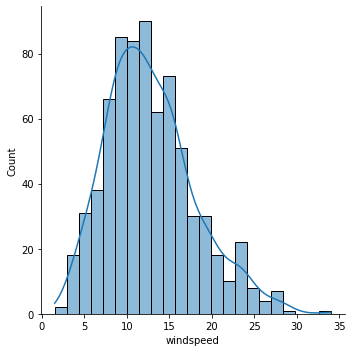

In [8]:
# Task 3.2: Type your code to plot histograms
#############################################################
sns.displot(kind='hist', x='temperature', data=data, kde=True)
sns.displot(kind='hist', x='feel_temperature', data=data, kde=True)
sns.displot(kind='hist', x='humidity', data=data, kde=True)
sns.displot(kind='hist', x='windspeed', data=data, kde=True)
#############################################################

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            731 non-null    int64  
 1   year              731 non-null    int64  
 2   month             731 non-null    int64  
 3   day               731 non-null    int64  
 4   weekday           731 non-null    object 
 5   is_holiday        731 non-null    int64  
 6   is_workingday     725 non-null    float64
 7   weather_type      731 non-null    object 
 8   temperature       731 non-null    float64
 9   feel_temperature  726 non-null    float64
 10  humidity          731 non-null    float64
 11  windspeed         731 non-null    float64
 12  rental_count      731 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 74.4+ KB


In [16]:
# Task 3.3: Type your code to find uniqe categories, maximum occuring categories and thier counts.
#############################################################
find_unique_cat=data.describe(include='all').transpose()
find_unique_cat


#weekday_vals=data['weekday'].describe()
#weekday_vals
#weather_type=data['weather_type'].describe()
#weather_type
#############################################################

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
row_id,731.0,NaN,NaN,NaN,365.0,211.165812,0.0,182.5,365.0,547.5,730.0
year,731.0,NaN,NaN,NaN,2011.500684,0.500342,2011.0,2011.0,2012.0,2012.0,2012.0
month,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
day,731.0,NaN,NaN,NaN,15.738714,8.809949,1.0,8.0,16.0,23.0,31.0
weekday,731,7,SAT,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
is_workingday,725.0,NaN,NaN,NaN,0.686897,0.464076,0.0,0.0,1.0,1.0,1.0
weather_type,731,3,CLEAR,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,731.0,NaN,NaN,NaN,20.31067,7.505342,2.4,13.8,20.4,26.9,35.3
feel_temperature,726.0,NaN,NaN,NaN,23.712121,8.13556,4.0,16.9,24.35,30.4,42.0


In [ ]:
data[(data['humidity'] < 20.5) | (data['humidity'] > 104.5)]

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count
49,49,2011,2,19,SAT,0,0.0,CLEAR,16.4,19.6,18.8,34.0,1635
68,68,2011,3,10,THU,0,1.0,LIGHT RAIN/SNOW,16.0,19.3,0.0,17.5,623
586,586,2012,8,9,THU,0,1.0,CLEAR,31.0,35.0,620.0,10.5,7286
592,592,2012,8,15,WED,0,1.0,CLEAR,29.0,32.7,620.0,11.4,7347
727,727,2012,12,28,FRI,0,1.0,CLOUDY/MIST,10.4,12.8,590.0,10.4,3095


In [ ]:
data[(data['temperature'] < -5.849999999999998) | (data['temperature'] > 46.55)]

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count


**Task 4 : Checking for Outlliers**
 * 4.1 Use box plot to analyse the columns `temperature` and `humidity`.
 * 4.2 If there are any outliers presentm drop the rows with the contaning the outliers.

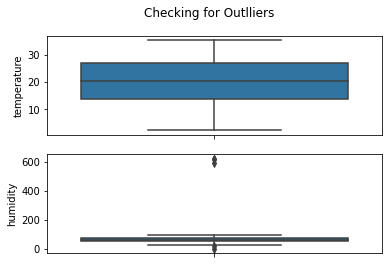

In [18]:
# Task 4.1: Type your code to create a box plots for the using the columns 'temperature' and 'humidity'.
#############################################################

fig, axes = plt.subplots(2, 1)

fig.suptitle('Checking for Outlliers')

sns.boxplot(ax=axes[0], data=data, y='temperature')
sns.boxplot(ax=axes[1], data=data, y='humidity')

#############################################################

In [19]:
from dataclasses import dataclass
# Task 4.2: Type your code to drop outliers if found in the columns 'temperature' and 'humidity'.
#############################################################
print(data['humidity'].describe())

IQR= data['humidity'].quantile(0.75)-data['humidity'].quantile(0.25)

upper_limit = data['humidity'].quantile(0.75) + 1.5*(IQR)
lower_limit = data['humidity'].quantile(0.25) - 1.5*(IQR)
print(f'upper_limit ={upper_limit}')
print(f'lower_limit ={lower_limit}')

#data[(data['humidity'] < lower_limit) | (data['humidity'] > upper_limit)]
data = data[(data['humidity'] > lower_limit) & (data['humidity'] < upper_limit)]

print(data['temperature'].describe())

IQR= data['temperature'].quantile(0.75)-data['temperature'].quantile(0.25)

upper_limit = data['temperature'].quantile(0.75) + 1.5*(IQR)
lower_limit = data['temperature'].quantile(0.25) - 1.5*(IQR)
print(f'temperature ={upper_limit}')
print(f'temperature ={lower_limit}')

#No outliers are exists in temperature

#############################################################

count    731.000000
mean      65.041313
std       37.804388
min        0.000000
25%       52.000000
50%       63.100000
75%       73.250000
max      620.000000
Name: humidity, dtype: float64
upper_limit =105.125
lower_limit =20.125
count    726.000000
mean      20.308953
std        7.501646
min        2.400000
25%       13.800000
50%       20.450000
75%       26.900000
max       35.300000
Name: temperature, dtype: float64
temperature =46.55
temperature =-5.849999999999998


In [20]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
row_id,726.0,NaN,NaN,NaN,364.72865,210.522822,0.0,183.25,364.5,545.75,730.0
year,726.0,NaN,NaN,NaN,2011.5,0.500345,2011.0,2011.0,2011.5,2012.0,2012.0
month,726.0,NaN,NaN,NaN,6.519284,3.450383,1.0,4.0,7.0,10.0,12.0
day,726.0,NaN,NaN,NaN,15.735537,8.821543,1.0,8.0,16.0,23.0,31.0
weekday,726,7,SUN,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_holiday,726.0,NaN,NaN,NaN,0.028926,0.167713,0.0,0.0,0.0,0.0,1.0
is_workingday,720.0,NaN,NaN,NaN,0.686111,0.464394,0.0,0.0,1.0,1.0,1.0
weather_type,726,3,CLEAR,460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,726.0,NaN,NaN,NaN,20.308953,7.501646,2.4,13.8,20.45,26.9,35.3
feel_temperature,721.0,NaN,NaN,NaN,23.710957,8.132767,4.0,16.9,24.4,30.4,42.0


**Task 5: Analyze `weather_type` column**

 * 5.1 Get uniqe values in the column `weather_type'
 * 5.2 Display freqeuncy table for the column 'weather_type'
 * 5.3 Display the frequncy table created in task 65.2 as a bar plot


In [21]:
# Task 5.1: complete the code to get an array of uniqe values in the column `weather_type' and print them.
#############################################################
unique_values =data['weather_type'].unique()

#############################################################
print(unique_values)

['CLOUDY/MIST' 'CLEAR' 'LIGHT RAIN/SNOW']


In [22]:
#############################################################
# Task 5.2: Type your code to construct and display freqeuncy table for the column 'weather_type'.
freqeuncy_table_weather_type = data['weather_type'].value_counts()
freqeuncy_table_weather_type
#############################################################

CLEAR              460
CLOUDY/MIST        246
LIGHT RAIN/SNOW     20
Name: weather_type, dtype: int64

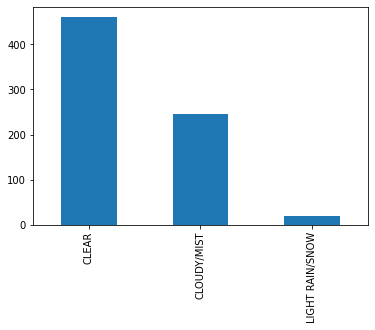

In [23]:
#############################################################
# Task 5.3: Display the frequncy table created in task 5.2 as a bar plot
freqeuncy_table_weather_type.plot(kind='bar')
#############################################################

**Task 6: If you found any column(s) with missing values in the tasks 1.3, treat missing values using a method your learned in the class.**

In [24]:
# Task 6: type your code here
#############################################################
data.dropna(how='any', axis=0, inplace=True)

#############################################################

In [25]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
row_id,715.0,NaN,NaN,NaN,364.640559,209.492546,0.0,184.5,365.0,543.5,730.0
year,715.0,NaN,NaN,NaN,2011.500699,0.50035,2011.0,2011.0,2012.0,2012.0,2012.0
month,715.0,NaN,NaN,NaN,6.507692,3.439087,1.0,4.0,7.0,9.5,12.0
day,715.0,NaN,NaN,NaN,15.745455,8.825548,1.0,8.0,16.0,23.0,31.0
weekday,715,7,TUE,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_holiday,715.0,NaN,NaN,NaN,0.027972,0.165008,0.0,0.0,0.0,0.0,1.0
is_workingday,715.0,NaN,NaN,NaN,0.686713,0.464155,0.0,0.0,1.0,1.0,1.0
weather_type,715,3,CLEAR,454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,715.0,NaN,NaN,NaN,20.339021,7.462804,2.4,13.9,20.6,26.85,35.3
feel_temperature,715.0,NaN,NaN,NaN,23.745035,8.102117,4.0,16.9,24.5,30.4,42.0


**Task 7: Quering data**
 * 7.1 Select and display the rows with `temperature` is greater than 30 and the day is a holiday (value of `is_holiday` is 1).
 * 7.2 Get the count of rows with `temperature` between than 25 and 30.
 * 7.3 Get the count of rows where holiday falls in a weekend ( weekday is either 'SAT' or 'SUN')

In [ ]:
# Task 7.1: Type your code to Select and display the rows with `temperature` is less than 30 and the day is a holiday (value of `is_holiday` is 1).
#############################################################
data.loc[(data['temperature'] < 30) & (data['is_holiday'] == 1) ]
#data.query(" temperature < 30 and is_holiday == 1")
#############################################################

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count
51,51,2011,2,21,MON,1,0.0,CLOUDY/MIST,12.4,14.2,60.5,20.6,1107
104,104,2011,4,15,FRI,1,0.0,CLEAR,18.3,22.1,67.1,15.2,3126
184,184,2011,7,4,MON,1,0.0,CLOUDY/MIST,29.8,33.3,63.8,5.5,6043
247,247,2011,9,5,MON,1,0.0,CLOUDY/MIST,27.6,31.3,79.0,14.3,3351
282,282,2011,10,10,MON,1,0.0,CLEAR,23.4,27.1,73.4,2.8,5117
314,314,2011,11,11,FRI,1,0.0,CLEAR,13.3,15.3,44.6,21.1,3368
327,327,2011,11,24,THU,1,0.0,CLEAR,15.3,18.6,54.9,11.2,1495
359,359,2011,12,26,MON,1,0.0,CLEAR,13.2,15.8,50.7,16.0,1317
366,366,2012,1,2,MON,1,0.0,CLEAR,11.2,12.6,38.1,22.1,1951
380,380,2012,1,16,MON,1,0.0,CLEAR,7.8,9.5,52.2,15.5,2298


In [47]:
data.query(" temperature < 30 and is_holiday == 1").count()

row_id              18
year                18
month               18
day                 18
weekday             18
is_holiday          18
is_workingday       18
weather_type        18
temperature         18
feel_temperature    18
humidity            18
windspeed           18
rental_count        18
is_weekend          18
dtype: int64

In [48]:
data.query("temperature < 30 and temperature >25").count()

row_id              163
year                163
month               163
day                 163
weekday             163
is_holiday          163
is_workingday       163
weather_type        163
temperature         163
feel_temperature    163
humidity            163
windspeed           163
rental_count        163
is_weekend          163
dtype: int64

In [ ]:
# Task 7.2: Type your code to get the count of rows on days having temperature between than 25 and 30.
# Hint: replace "?"s by appropriate expression(s).
#############################################################
row_count = data.query("temperature < 30 and temperature >25").value_counts()

#############################################################
print(row_count)

row_id  year  month  day  weekday  is_holiday  is_workingday  weather_type  temperature  feel_temperature  humidity  windspeed  rental_count
115     2011  4      26   TUE      0           1.0            CLEAR         25.9         29.7              72.9      21.9       4400            1
568     2012  7      22   SUN      0           0.0            CLOUDY/MIST   27.4         31.2              76.2      6.3        7410            1
525     2012  6      9    SAT      0           0.0            CLEAR         29.1         32.4              43.7      9.7        7498            1
526     2012  6      10   SUN      0           0.0            CLEAR         29.8         33.2              53.8      9.0        6598            1
527     2012  6      11   MON      0           1.0            CLOUDY/MIST   29.6         33.0              58.8      13.9       6664            1
                                                                                                                                 

In [ ]:
#7.3 Get the count of rows where holiday is a Friday ( weekday 'FRI')
# Hint: replace "?"s by appropriate expressions
#############################################################
row_count = data.query("weekday == 'FRI' and is_holiday == 1").value_counts()
print(row_count)
#############################################################


row_id  year  month  day  weekday  is_holiday  is_workingday  weather_type  temperature  feel_temperature  humidity  windspeed  rental_count
104     2011  4      15   FRI      1           0.0            CLEAR         18.3         22.1              67.1      15.2       3126            1
314     2011  11     11   FRI      1           0.0            CLEAR         13.3         15.3              44.6      21.1       3368            1
dtype: int64


**Task 8: Group by aggregate**
 * 8.1: Summarize the dataset to get `min`, `max`, `mean`  and `sum` of `reantal_count` by the `weekday` (SUN, MON,.....)
 * 8.2: Summarize the dataset to get `min`, `max`, `mean`  and `sum` of `reantal_count` by the `weather_type`

In [ ]:
# Task 8.1
# Hint: replace "?"s by your expressions
#############################################################
summary1 = data.groupby('weekday').agg({'rental_count': ['min', 'max', 'mean', 'sum']})
#############################################################
print(summary1)

        rental_count                           
                 min   max         mean     sum
weekday                                        
FRI             1167  8362  4682.890000  468289
MON               22  7525  4346.339806  447673
SAT              627  8714  4563.254902  465452
SUN              605  8227  4273.882353  435936
THU              431  7804  4681.235294  477486
TUE              683  7767  4510.663462  469109
WED              441  8173  4521.509804  461194


In [ ]:
# Task 8.2
# Hint: replace "?"s by your expressions
#############################################################
summary2 = data.groupby('weather_type').agg({'rental_count': ['min', 'max', 'mean', 'sum']})
#############################################################
print(summary2)

                rental_count                            
                         min   max         mean      sum
weather_type                                            
CLEAR                    431  8714  4878.233480  2214718
CLOUDY/MIST              605  8362  4038.070539   973175
LIGHT RAIN/SNOW           22  4639  1862.300000    37246


# 5. Building Machine Learning model

**Task 9: Get the correlation matrix for the columns `is_holiday`, `is_workingday`, `weather_type`, `temperature`, `feel_temperature`, `humidity`,`windspeed`, ans `rental_count`**

In [50]:
# Task 9: Complete the code below using correlation function Pandas.
#############################################################
correlation_matrix = data[['is_holiday',  'is_workingday', 'weather_type','temperature','feel_temperature','humidity','windspeed','rental_count']].corr()

#############################################################

correlation_matrix

,is_holiday,is_workingday,temperature,feel_temperature,humidity,windspeed,rental_count
is_holiday,1.000000,-0.251154,-0.015559,-0.018858,-0.012864,0.006082,-0.056302
is_workingday,-0.251154,1.000000,0.040409,0.039920,0.022036,-0.010123,0.049449
temperature,-0.015559,0.040409,1.000000,0.991419,0.124850,-0.166819,0.623404
feel_temperature,-0.018858,0.039920,0.991419,1.000000,0.137646,-0.192304,0.627184
humidity,-0.012864,0.022036,0.124850,0.137646,1.000000,-0.228496,-0.127304
windspeed,0.006082,-0.010123,-0.166819,-0.192304,-0.228496,1.000000,-0.234937
rental_count,-0.056302,0.049449,0.623404,0.627184,-0.127304,-0.234937,1.000000


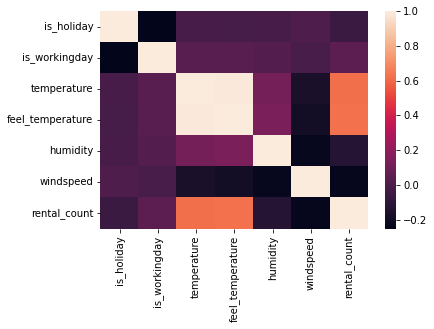

In [ ]:
# Bonus/Optional: Type your code to display corelation matrix as a heat map (hint: you may use heatmap function from the seaborn library)
#############################################################
sns.heatmap(correlation_matrix)
#############################################################

In [56]:
# Bonus/Optional: Type your code below to encode the columns `weekday` and `weather_type`
#############################################################

data['weekday_encode'] = data['weekday']

replacements_dict = {'SUN':0,
                     'MON':1,
                     'TUE':2,
                     'WED':3,
                     'THU':4,
                     'FRI':5,
                     'SAT':6,}

data['weekday_encode'].replace(replacements_dict, inplace=True)

data['weather_type_encode'] = data['weather_type']

replacements_dict = {'CLEAR':0,
                     'CLOUDY/MIST':1,
                     'LIGHT RAIN/SNOW':2,
                     }

data['weather_type_encode'].replace(replacements_dict, inplace=True)

data.sample(5)
#############################################################

,row_id,year,month,day,weekday,is_holiday,is_workingday,weather_type,temperature,feel_temperature,humidity,windspeed,rental_count,is_weekend,weekday_encode,weather_type_encode
381,381,2012,1,17,TUE,0,1.0,CLOUDY/MIST,15.3,18.2,71.6,23.4,2935,0,2,1
697,697,2012,11,28,WED,0,1.0,CLEAR,12.2,14.5,50.6,14.1,5260,0,3,0
331,331,2011,11,28,MON,0,1.0,CLEAR,20.6,24.5,74.3,9.5,3867,0,1,0
545,545,2012,6,29,FRI,0,1.0,CLEAR,34.2,39.3,48.9,11.1,5463,0,5,0
649,649,2012,10,11,THU,0,1.0,CLEAR,17.8,21.6,46.3,12.2,7570,0,4,0


In [31]:
# Bonus/Optional: Type your code below to create a new variable `is_weekend` (1 if weekdaay is either 'SAT' or 'SUN')
# Hint: Replace "?" by the appropriate expression
#############################################################
data['is_weekend'] = np.where((data['weekday'] == 'SAT') | (data['weekday'] =='SUN'), 1,0)

data[['is_weekend','weekday']].sample(5)
#############################################################

,is_weekend,weekday
517,0,FRI
569,0,MON
12,0,THU
48,0,FRI
589,1,SUN


**Task 10:** 
 * 10.1 Identify indepenet (X) and dependent (y) variables your would use to build the model
 * 10.2 Split dataset into two datasets: tain and test

In [57]:
# Get liest of column names
data.columns

Index(['row_id', 'year', 'month', 'day', 'weekday', 'is_holiday',
       'is_workingday', 'weather_type', 'temperature', 'feel_temperature',
       'humidity', 'windspeed', 'rental_count', 'is_weekend', 'weekday_encode',
       'weather_type_encode'],
      dtype='object')

In [32]:
# Task 10.1: Identify indepenet (X) and dependent (y) variables and complete the code below. 
# You may need to type of copy column names from the dataframe. It is recomended to begin with minimum selected feature variables.
#############################################################
X_variables = ['temperature','windspeed','humidity','is_holiday','is_workingday','feel_temperature']
y_variable = 'rental_count'
#############################################################

print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

X_variables = ['temperature', 'windspeed', 'humidity', 'is_holiday', 'is_workingday', 'feel_temperature']
y_variable = rental_count


In [34]:
# Task 10.2 Type your code below to split the dataset into two datasets: train and test
# Hint1: use appropriate function from scikit-learn (replace "?"  by the correct expression to import the function)
# Hint 2: Use parameters test_size=0.3, random_state=0
#############################################################
from sklearn.model_selection import train_test_split

X = data[X_variables]
y = data[y_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#############################################################
print("X_train size:", X_train.shape[0])
print("X_test size:", X_test.shape[0])

X_train size: 500
X_test size: 215


In [33]:
# Train model
from sklearn.linear_model import LinearRegression
X = data[X_variables]
y = data[y_variable]
reg = LinearRegression().fit(X, y)

In [35]:
# Test model on a sample input data
input_row = {'is_holiday': 0,
             'is_workingday': 1,
             'temperature': 15.0,
             'feel_temperature': 16.1,
              'humidity': 57.0,                       
              'windspeed': 21.5
            }

input_data_frame = pd.DataFrame([input_row])
reg.predict(input_data_frame)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([1789.87950024])

# 6. Model Evaluation

In [36]:
# Predict on test data
y_test_pred = reg.predict(X_test)


In [37]:
# Coefficient of determination

from sklearn.metrics import r2_score

print('r2_score:', r2_score(y_test, y_test_pred))

r2_score: 0.4758741847427824


In [59]:
# Bonus/Optional:Fine-tune the model to improve r2_score
#############################################################
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_variables1 = ['temperature','humidity','windspeed','is_workingday','is_holiday']
y_variable1 = 'rental_count'

X = data[X_variables1]
y = data[y_variable1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


X = data[X_variables1]
y = data[y_variable1]
reg = LinearRegression().fit(X, y)

y_test_pred = reg.predict(X_test)

print('r2_score:', r2_score(y_test, y_test_pred))
#############################################################

r2_score: 0.4761029474404138


<hr>
Last update 2022-10-06 by Sumudu Tennakoon